In [6]:
import graficas as g
import matplotlib.pyplot as plt
import time
import numpy as np
import importlib
import entropia as en

In [11]:
importlib.reload(g)

<module 'graficas' from 'C:\\proyectos\\repositorios\\pt_robustez\\graficas.py'>

In [3]:
n = 1000
m = 15

In [4]:
#Lo que queremos hacer es hacer simulaciones atacando la misma red
num_simulaciones = 50

matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    AD_BA_fallos = []
    AD_WS_fallos = []

    for j in range(N):
        AD_BA_fallos.append(g.grado_promedio(G_BA))
        AD_WS_fallos.append(g.grado_promedio(G_WS))

        G_BA = g.ataques(G_BA,'random')
        G_WS = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(AD_BA_fallos)
    matriz_WS_fallos.append(AD_WS_fallos)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")


El tiempo total de ejecución fue: 40.853029012680054


In [5]:
#Ahora vamos a hacer 
num_simulaciones = 50

matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    AD_BA_ataques = []
    AD_WS_ataques = []

    for j in range(N):
        AD_BA_ataques.append(g.grado_promedio(G_BA))
        AD_WS_ataques.append(g.grado_promedio(G_WS))

        G_BA = g.ataques(G_BA,'degree')
        G_WS = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(AD_BA_ataques)
    matriz_WS_ataques.append(AD_WS_ataques)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 72.18377876281738


In [8]:
#Con lo anterior tenemos 50 listas en dónde guardamos los resultados de las simulaciones y ahora vamos a hacer
#una ponderación de los resultados en el i-ésimo ataque para así obtener un resultado más confiable

resultados_AD_BA_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_AD_WS_fallos = [sum(col)/num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_AD_BA_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_AD_WS_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]


In [12]:
#Ahora vamos a construir simulaciones para la densidad

num_simulaciones = 50

matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,m+m,0.5)

    N = len(G_BA)

    D_BA_fallos = []
    D_WS_fallos = []

    for j in range(N):
        D_BA_fallos.append(g.densidad(G_BA,N))
        D_WS_fallos.append(g.densidad(G_WS,N))

        G_BA = g.ataques(G_BA,'random')
        G_WS = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(D_BA_fallos)
    matriz_WS_fallos.append(D_WS_fallos)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")


El tiempo total de ejecución fue: 40.6327908039093


In [13]:

num_simulaciones = 50

matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,m+m,0.5)

    N = len(G_BA)

    D_BA_ataques = []
    D_WS_ataques = []

    for j in range(N):
        D_BA_ataques.append(g.densidad(G_BA,N))
        D_WS_ataques.append(g.densidad(G_WS,N))

        G_BA = g.ataques(G_BA,'degree')
        G_WS = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(D_BA_ataques)
    matriz_WS_ataques.append(D_WS_ataques)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 68.75670289993286


In [14]:
resultados_D_BA_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_D_WS_fallos = [sum(col)/num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_D_BA_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_D_WS_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]

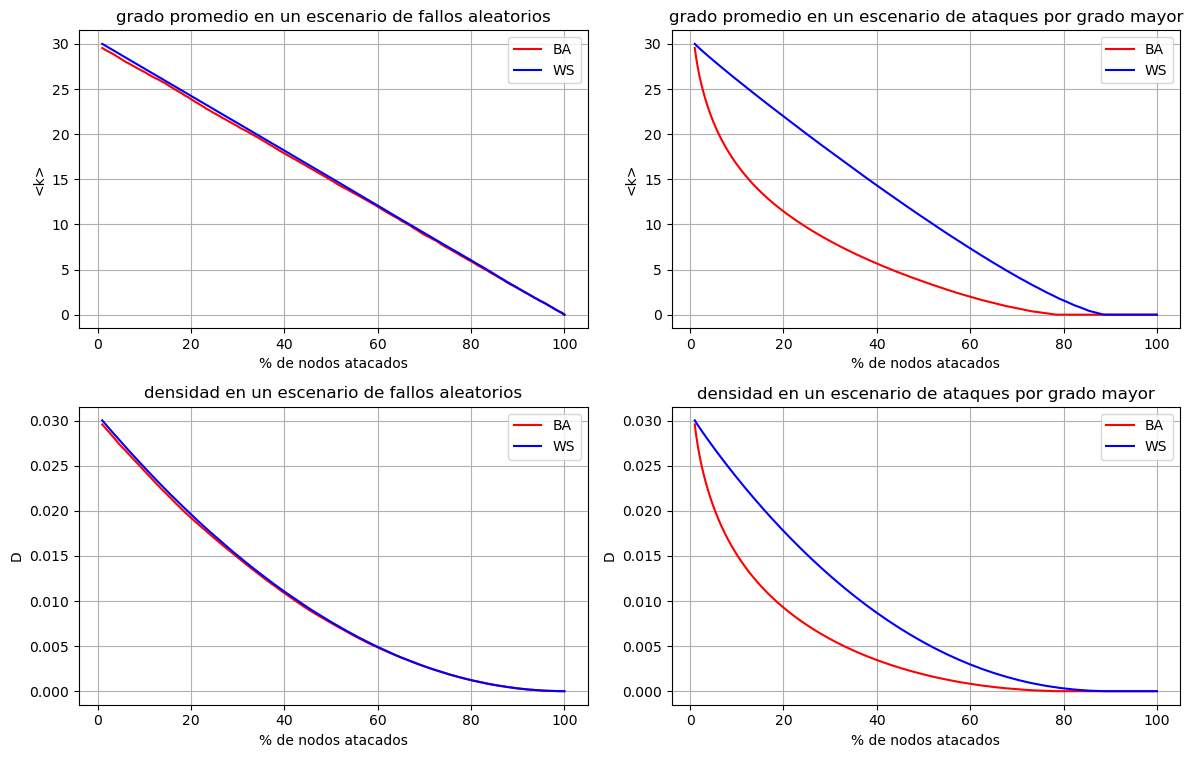

In [24]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

x = np.linspace(1,100,N)

# Gráfica 1: AD - Fallos
axs[0, 0].plot(x,resultados_AD_BA_fallos, label="BA", color="red")
axs[0, 0].plot(x,resultados_AD_WS_fallos, label="WS", color="blue")
axs[0, 0].set_title("grado promedio en un escenario de fallos aleatorios")
axs[0, 0].legend()
axs[0, 0].set_xlabel("% de nodos atacados")
axs[0, 0].set_ylabel("<k>")
axs[0,0].grid(True)

# Gráfica 2: AD - Ataques
axs[0, 1].plot(x,resultados_AD_BA_ataques, label="BA", color="red")
axs[0, 1].plot(x,resultados_AD_WS_ataques, label="WS", color="blue")
axs[0, 1].set_title("grado promedio en un escenario de ataques por grado mayor")
axs[0, 1].legend()
axs[0, 1].set_xlabel("% de nodos atacados")
axs[0, 1].set_ylabel("<k>")
axs[0,1].grid(True)


# Gráfica 3: D - Fallos
axs[1, 0].plot(x,resultados_D_BA_fallos, label="BA", color="red")
axs[1, 0].plot(x,resultados_D_WS_fallos, label="WS", color="blue")
axs[1, 0].set_title("densidad en un escenario de fallos aleatorios")
axs[1, 0].legend()
axs[1, 0].set_xlabel("% de nodos atacados")
axs[1, 0].set_ylabel("D")
axs[1,0].grid(True)

# Gráfica 4: D - Ataques
axs[1, 1].plot(x,resultados_D_BA_ataques, label="BA", color="red")
axs[1, 1].plot(x,resultados_D_WS_ataques, label="WS", color="blue")
axs[1, 1].set_title("densidad en un escenario de ataques por grado mayor")
axs[1, 1].legend()
axs[1, 1].set_xlabel("% de nodos atacados")
axs[1, 1].set_ylabel("D")
axs[1,1].grid(True)

plt.savefig("medidas_estructurales.png", dpi=300)


# Ajustes finales
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Deja espacio al título
plt.show()

In [5]:
G_BA = g.crear_grafica('barabasi',1000,15,0)
G_WS = g.crear_grafica('watts',1000,30,0.5)

In [7]:
entropia = en.entropia(G_BA)

In [11]:
print(entropia/entropia)

1.0


In [13]:
N = len(G_BA)

inicio = time.time()

H_1_BA_fallos = []
H_1_WS_fallos = []


for j in range(1,N,1):
    print(f"iteración: {j}")
    G_1 = G_BA.copy()
    G_2 = G_WS.copy()
    H_1_BA_fallos.append(g.indice_robustez(G_1,en.entropia,2,'random',j))
    H_1_WS_fallos.append(g.indice_robustez(G_2,en.entropia,2,'random',j))

final = time.time()

print(f"El tiempo de ejecución fue de: {final - inicio}")

iteración: 1
iteración: 2
iteración: 3
iteración: 4
iteración: 5
iteración: 6
iteración: 7
iteración: 8
iteración: 9
iteración: 10
iteración: 11
iteración: 12
iteración: 13
iteración: 14
iteración: 15
iteración: 16
iteración: 17
iteración: 18
iteración: 19
iteración: 20
iteración: 21
iteración: 22
iteración: 23
iteración: 24
iteración: 25
iteración: 26
iteración: 27
iteración: 28
iteración: 29
iteración: 30
iteración: 31
iteración: 32
iteración: 33
iteración: 34
iteración: 35
iteración: 36
iteración: 37
iteración: 38
iteración: 39
iteración: 40
iteración: 41
iteración: 42
iteración: 43
iteración: 44
iteración: 45
iteración: 46
iteración: 47
iteración: 48
iteración: 49
iteración: 50
iteración: 51
iteración: 52
iteración: 53
iteración: 54
iteración: 55
iteración: 56
iteración: 57
iteración: 58
iteración: 59
iteración: 60


KeyboardInterrupt: 